## Neural Network Classification in TensorFlow

* Architecture of a neural network **classification** model
* Input shapes and output shapes of a **classification** model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
 * Creating a model, compiling a model, fiiting a model, evaluating a model
* Different **classification** evaluation methods
* Saving and loading models

👁️ Andre Karpathy - [A recipe for training Nueral Networks](https://karpathy.github.io/2019/04/25/recipe/)

### Creating Data to view and fit

We can do a small prerehearsal model before rehearsal

In [26]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [27]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [28]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let`s visualize data to better understand it

In [29]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0],'X1':X[:, 1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


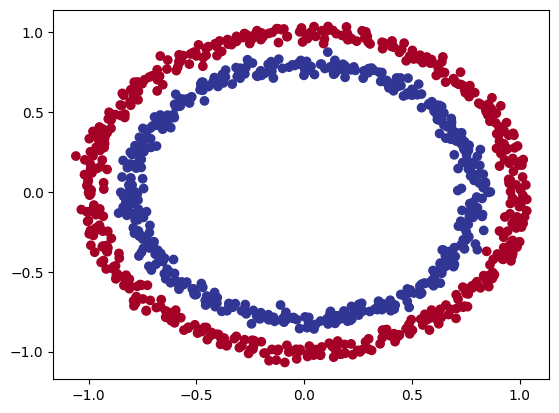

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


We want a model to predict the line between red and blue

👉 [playground.tensorflow.org](https://playground.tensorflow.org/)

### Input and Output Shapes

In [31]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [32]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [33]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

In [34]:
# Import Tensorflow
import tensorflow as tf

In [35]:
# Set the random seed
tf.random.set_seed (42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1034 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.6134 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4960


In [37]:
# Improve our model training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our mdel is getting around 50% accuracy... it's performing as if it's guessing

So let's add one more layer and keep training for longer...

In [39]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932545900344849, 0.5]

### Improving our model

In [54]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939547657966614, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unnique class falls)

In [45]:
import numpy as np

In [47]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classification


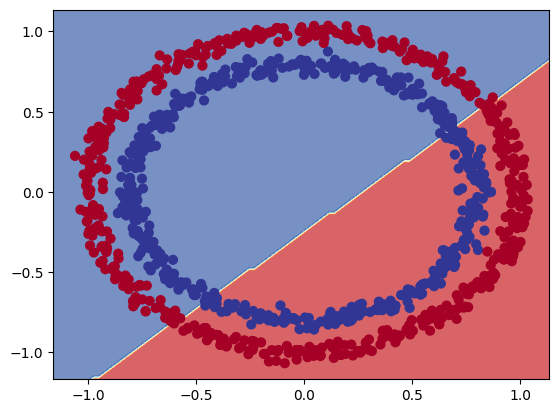

In [48]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [56]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]




In [59]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 22s 5ms/step - loss: 536.8093 - mae: 536.8093
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 438.8723 - mae: 438.8723
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 345.3906 - mae: 345.3906
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 248.4156 - mae: 248.4156
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 146.8613 - mae: 146.8613
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 52.9421 - mae: 52.9421
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 73.4505 - mae: 73.4505
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 74.1990 - mae: 74.1990
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 51.0694 - mae: 51.0694
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.1943 - mae: 49.1943
Epoch 11/100
5/5 [==============================

2/2 [==============================] - 0s 9ms/step


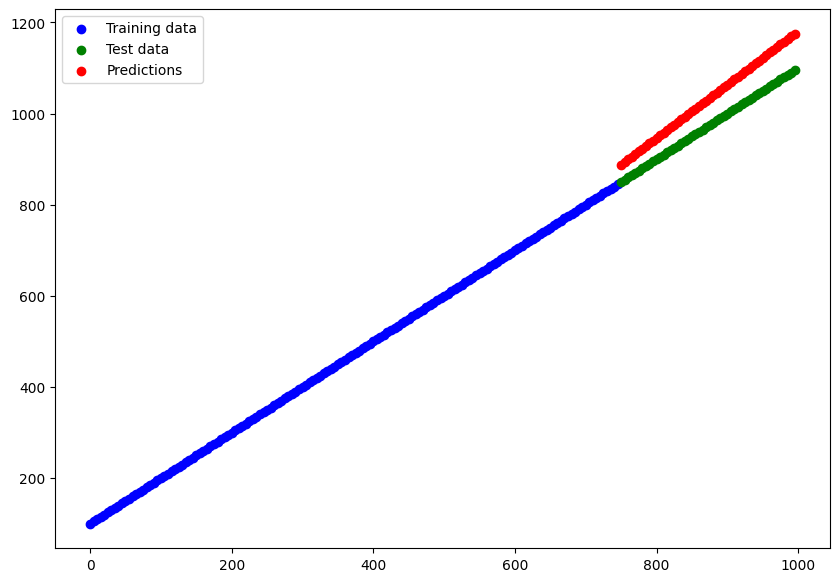

In [60]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### The missing piece: Non-Linearity